# DATA AUGMENTATION

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
xtrain = train_data_gen.flow_from_directory(r"C:\Users\manoj\Downloads\IBM\Data Set\Flowers-Dataset\flowers",target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4312 images belonging to 5 classes.


In [5]:
xtest = test_datagen.flow_from_directory(r"C:\Users\manoj\Downloads\IBM\Data Set\Flowers-Dataset\flowers",
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4312 images belonging to 5 classes.


In [6]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# CNN MODEL

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300,activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

In [9]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [10]:
model.fit(xtrain, steps_per_epoch = len(xtrain),epochs = 10,
          validation_data = xtest,validation_steps = len(xtest))

Epoch 1/10
44/44 [==============================] - 57s 1s/step - loss: 2.1378 - accuracy: 0.3305 - val_loss: 1.2899 - val_accuracy: 0.4638
Epoch 2/10
44/44 [==============================] - 51s 1s/step - loss: 1.1900 - accuracy: 0.5179 - val_loss: 1.1060 - val_accuracy: 0.5626
Epoch 3/10
44/44 [==============================] - 50s 1s/step - loss: 1.0806 - accuracy: 0.5719 - val_loss: 1.0227 - val_accuracy: 0.6000
Epoch 4/10
44/44 [==============================] - 50s 1s/step - loss: 1.0213 - accuracy: 0.6032 - val_loss: 1.0365 - val_accuracy: 0.6009
Epoch 5/10
44/44 [==============================] - 50s 1s/step - loss: 0.9728 - accuracy: 0.6180 - val_loss: 0.9644 - val_accuracy: 0.6313
Epoch 6/10
44/44 [==============================] - 51s 1s/step - loss: 0.9517 - accuracy: 0.6378 - val_loss: 0.9594 - val_accuracy: 0.6340
Epoch 7/10
44/44 [==============================] - 49s 1s/step - loss: 0.9145 - accuracy: 0.6496 - val_loss: 0.8828 - val_accuracy: 0.6686
Epoch 8/10
44/44 [==

# MODEL TUNING

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [12]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))

C:\Users\manoj\AppData\Local\Temp\ipykernel_32400\147617075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))


Epoch 1/10
44/44 [==============================] - 50s 1s/step - loss: 0.8099 - accuracy: 0.6897 - val_loss: 0.8251 - val_accuracy: 0.6892 - lr: 0.0010
Epoch 2/10
44/44 [==============================] - 48s 1s/step - loss: 0.8166 - accuracy: 0.6830 - val_loss: 0.8042 - val_accuracy: 0.6962 - lr: 0.0010
Epoch 3/10
44/44 [==============================] - 48s 1s/step - loss: 0.7979 - accuracy: 0.6913 - val_loss: 0.8064 - val_accuracy: 0.6939 - lr: 0.0010
Epoch 4/10
44/44 [==============================] - 49s 1s/step - loss: 0.7756 - accuracy: 0.6946 - val_loss: 0.8164 - val_accuracy: 0.6939 - lr: 0.0010
Epoch 5/10
44/44 [==============================] - 37s 841ms/step - loss: 0.7647 - accuracy: 0.7110 - val_loss: 0.7444 - val_accuracy: 0.7192 - lr: 0.0010
Epoch 6/10
44/44 [==============================] - 20s 456ms/step - loss: 0.7390 - accuracy: 0.7145 - val_loss: 0.8175 - val_accuracy: 0.6974 - lr: 0.0010
Epoch 7/10
44/44 [==============================] - 20s 448ms/step - loss: 0

# SAVING THE MODEL

In [13]:
model.save("flowerss.h5")

# TESTING THE MODEL

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [15]:
model = load_model("flowerss.h5")

In [16]:
img = image.load_img("3466923719_b4b6df7f8b_n.jpg",target_size = (150,150))

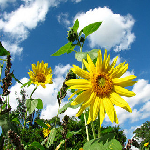

In [17]:
img

In [18]:
img = image.load_img("100930342_92e8746431_n.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 105ms/step


'tulip'

In [19]:
img = image.load_img("13920113_f03e867ea7_m.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 23ms/step


'daisy'